<a href="https://colab.research.google.com/github/radeonaru/pcvk_ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Muhammad Bagus Indrawan**

**Kelas : TI-3A/20**

**NIM : 2241720217**

# Tugas Praktikum

1. Membuat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


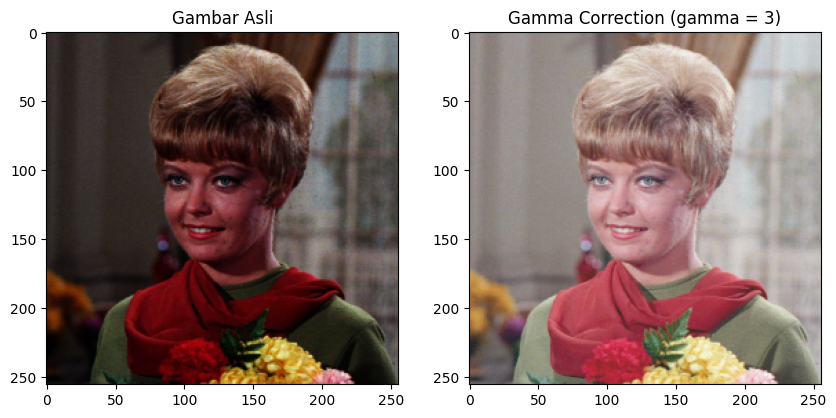

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

# Membaca citra
original = cv.imread('/content/drive/MyDrive/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

# Melakukan gamma correction
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

plt.figure(figsize=(10, 5))

# Menampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

# Menampilkan citra hasil gamma correction
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title(f'Gamma Correction (gamma = {gamma})')

# Menampilkan semua subplot
plt.show()

2. Membuat SImulasi Image Depth

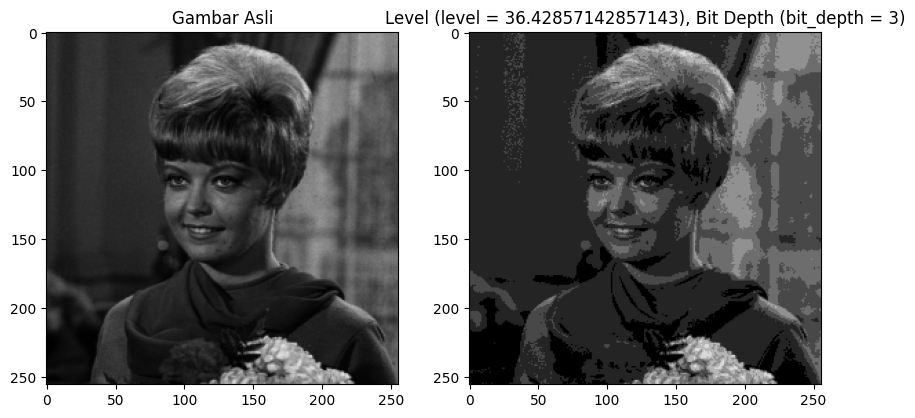

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Mendefinisikan kedalaman bit
bit_depth = 3
# Menghitung level intensitas berdasarkan kedalaman bit
level_value = 255 / (pow(2, bit_depth) - 1)

# Membaca citra dalam format grayscale
gray_image = cv.imread('/content/drive/MyDrive/female.tiff', cv.IMREAD_GRAYSCALE)
# Membuat array kosong untuk citra hasil dengan ukuran dan tipe data yang sama
quantized_image = np.zeros(gray_image.shape, gray_image.dtype)

# Melakukan kuantisasi pada citra
for y in range(gray_image.shape[0]):
    for x in range(gray_image.shape[1]):
        quantized_image[y, x] = np.clip(np.round(gray_image[y, x] / level_value) * level_value, 0, 255)

# Menyiapkan untuk menampilkan citra
plt.figure(figsize=(10, 5))

# Menampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(gray_image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

# Menampilkan citra hasil kuantisasi
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(quantized_image, cv.COLOR_BGR2RGB))
plt.title(f'Level (level = {level_value}), Bit Depth (bit_depth = {bit_depth})')

# Menampilkan semua subplot
plt.show()


3. Buat modul Average Denoising

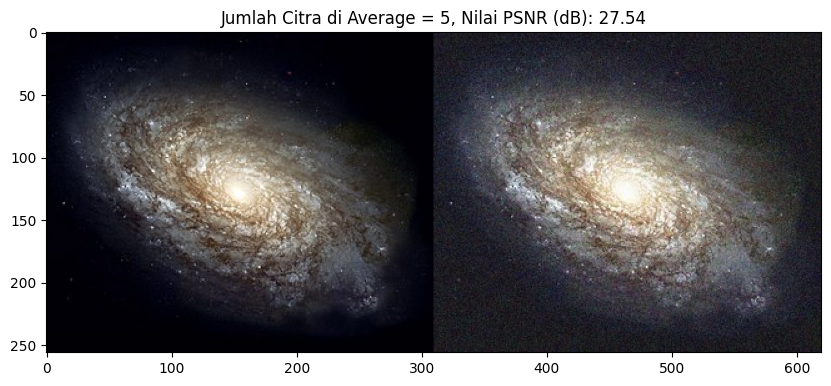

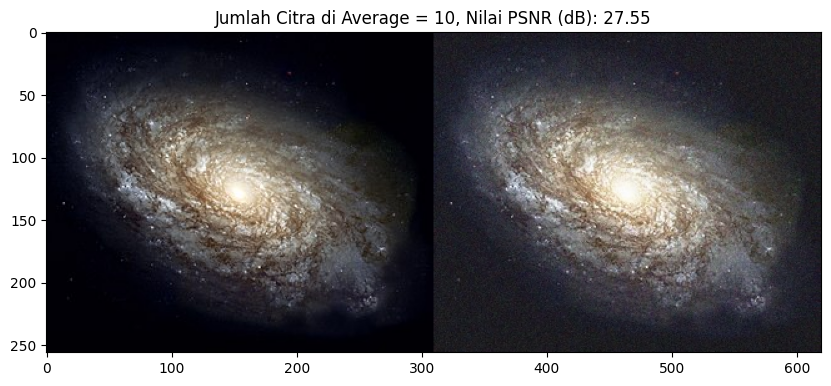

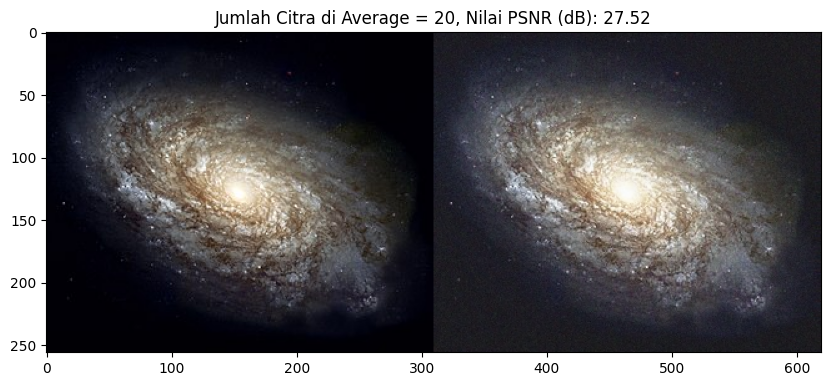

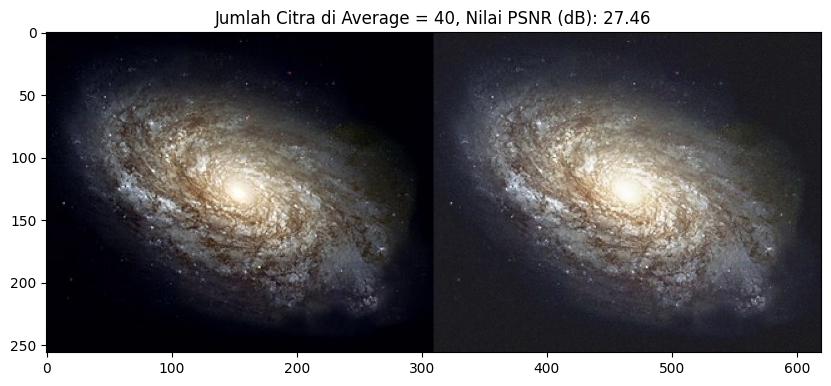

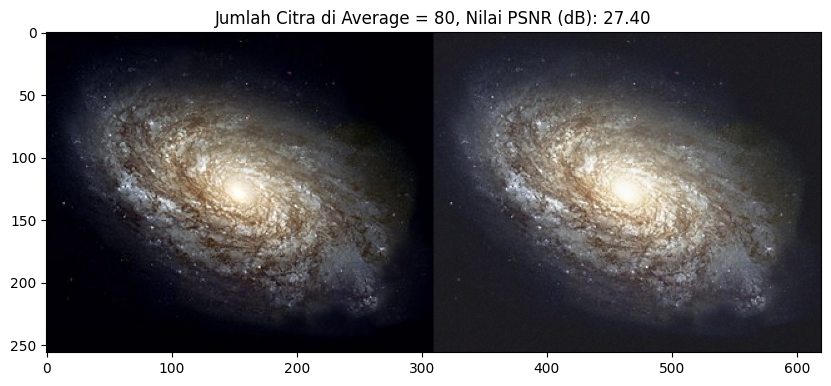

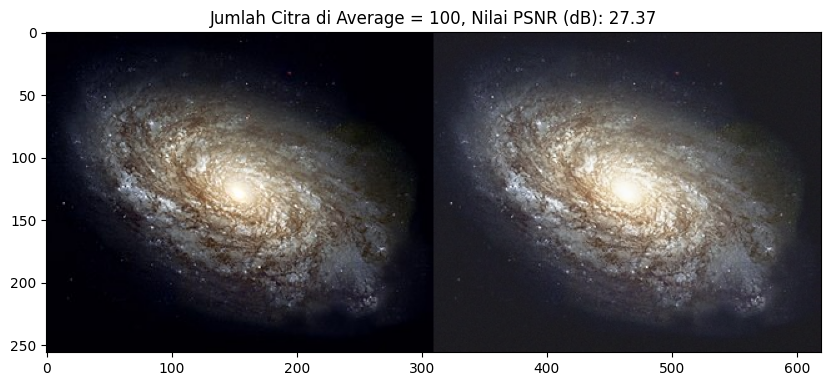

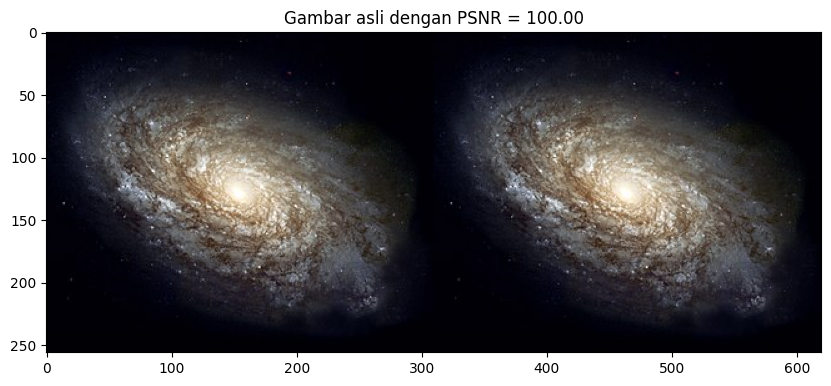

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR (Peak Signal-to-Noise Ratio)
def compute_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    if mse == 0:
        psnr_value = 100
    else:
        max_pixel_value = 255.0
        psnr_value = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr_value

# Memuat gambar asli dari file
input_image = cv.imread('/content/drive/MyDrive/galaxy.jpg')

# Memeriksa apakah gambar asli berhasil dimuat
if input_image is None:
    print("Error: Gambar asli tidak ditemukan atau path salah.")
else:
    # Daftar jumlah gambar dengan level noise berbeda yang akan dirata-ratakan
    noise_levels = [5, 10, 20, 40, 80, 100]

    for count in noise_levels:
        # Membuat array kosong untuk menampung rata-rata gambar dengan noise
        accumulated_noise = np.zeros_like(input_image, dtype=np.float32)

        # Memuat dan mengakumulasi gambar dengan noise
        for i in range(1, count + 1):
            noise_image = cv.imread(f'/content/drive/MyDrive/noises/{i}.jpg')

            # Memeriksa apakah gambar noise berhasil dimuat
            if noise_image is None:
                print(f"Error: Gambar noise {i}.jpg tidak ditemukan atau path salah.")
                continue

            # Mengakumulasi gambar dengan noise
            accumulated_noise += noise_image.astype(np.float32)

        # Merata-ratakan gambar yang diakumulasi
        average_noise_image = accumulated_noise / count

        # Mengubah gambar yang telah dirata-ratakan kembali ke format uint8
        average_noise_image = np.clip(average_noise_image, 0, 255).astype(np.uint8)

        # Menghitung PSNR antara gambar asli dan gambar noise yang dirata-ratakan
        psnr_value = compute_psnr(input_image, average_noise_image)

        # Menggabungkan gambar asli dan gambar noise yang dirata-ratakan secara horizontal
        combined_frame = cv.hconcat([input_image, average_noise_image])

        # Menampilkan gambar
        plt.figure(figsize=(10, 5))
        plt.imshow(cv.cvtColor(combined_frame, cv.COLOR_BGR2RGB))
        plt.title(f"Jumlah Citra di Average = {count}, Nilai PSNR (dB): {psnr_value:.2f}")
        plt.show()

    # Menghitung PSNR antara gambar asli dan gambar yang tidak berubah
    psnr_value = compute_psnr(input_image, input_image)
    combined_frame = cv.hconcat([input_image, input_image])

    plt.figure(figsize=(10, 5))
    plt.imshow(cv.cvtColor(combined_frame, cv.COLOR_BGR2RGB))
    plt.title(f"Gambar asli dengan PSNR = {psnr_value:.2f}")
    plt.show()

Kesimpulannya, semakin mendekati nilai Peak Signal-to-Noise Ratio (PSNR) 100, semakin sedikit noise yang terdapat dalam gambar tersebut.

4. Membuat image masking

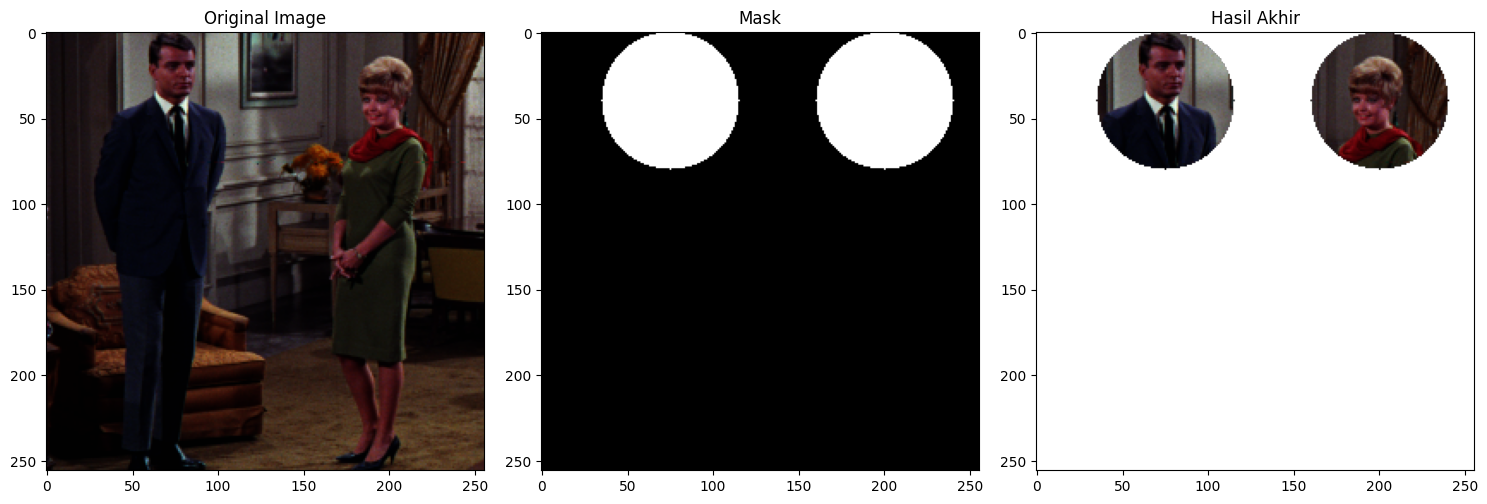

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Path untuk gambar yang akan digunakan
image_file_path = '/content/drive/MyDrive/couple.tiff'
img = cv.imread(image_file_path)

# Membuat mask dengan ukuran gambar
mask_array = np.zeros(img.shape[:2], dtype="uint8")

# Menggambar dua lingkaran pada mask
cv.circle(mask_array, (75, 40), 40, 255, -1)
cv.circle(mask_array, (200, 40), 40, 255, -1)

# Menggunakan bitwise AND untuk menerapkan mask pada gambar
masked_image = cv.bitwise_and(img, img, mask=mask_array)

# Mengonversi gambar yang dimask ke grayscale
temp_gray = cv.cvtColor(masked_image, cv.COLOR_BGR2GRAY)

# Mengatur threshold untuk membuat alpha channel
_, alpha_channel = cv.threshold(temp_gray, 0, 255, cv.THRESH_BINARY)

# Memisahkan channel warna dari gambar yang dimask
blue_channel, green_channel, red_channel = cv.split(masked_image)

# Menggabungkan channel menjadi RGBA
rgba_channels = [blue_channel, green_channel, red_channel, alpha_channel]

# Menggabungkan menjadi gambar akhir
final_result = cv.merge(rgba_channels)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Menampilkan gambar asli
plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Menampilkan mask
plt.subplot(132)
plt.imshow(mask_array, cmap='gray')
plt.title('Mask')
plt.axis('on')

# Menampilkan hasil akhir
plt.subplot(133)
plt.imshow(cv.cvtColor(final_result, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()


5. Melakukan percobaan dengan operator lain

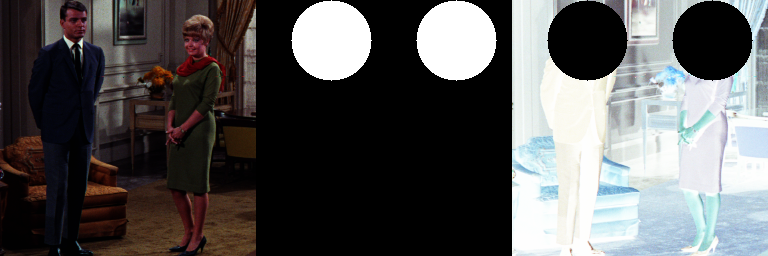

In [14]:
# Operasi NOT (komplemen)
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar dari file
input_image = cv.imread('/content/drive/MyDrive/couple.tiff')

# Membuat mask untuk operasi NOT
mask1_not = np.zeros(img.shape, dtype = np.uint8)
mask1_not = cv.circle(mask1_not, (75,40), 40, (255,255,255), -1)

mask2_not = np.zeros(img.shape, dtype = np.uint8)
mask2_not = cv.circle(mask1_not, (200,40), 40, (255,255,255), -1)

# Melakukan operasi NOT pada gambar dan menggabungkan dengan mask
result = cv.bitwise_not(img) & cv.bitwise_not(mask1_not)

# Menggabungkan gambar asli, mask, dan hasil
final_frame = cv.hconcat((img, mask1_not, result))

# Menampilkan gambar hasil
cv2_imshow(final_frame)


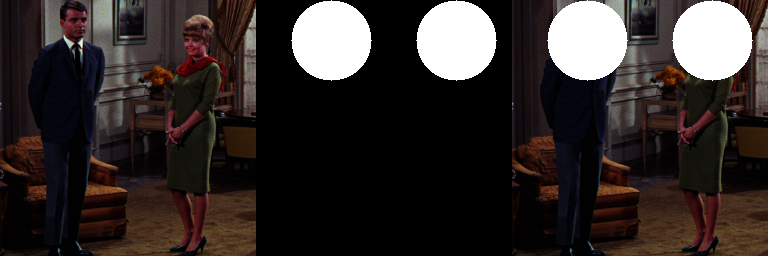

In [15]:
# Operasi OR (atau)
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar dari file
img = cv.imread('/content/drive/MyDrive/couple.tiff')

# Membuat mask untuk operasi OR
mask1_or = np.zeros(img.shape, dtype = np.uint8)
mask1_or = cv.circle(mask1_or, (75,40), 40, (255,255,255), -1)

mask2_or = cv.circle(mask1_or, (200,40), 40, (255,255,255), -1)

# Melakukan operasi OR antara mask dan gambar
result = mask1_or | img

# Menggabungkan gambar asli, mask, dan hasil
final_frame = cv.hconcat((img, mask1_or, result))

# Menampilkan gambar hasil
cv2_imshow(final_frame)

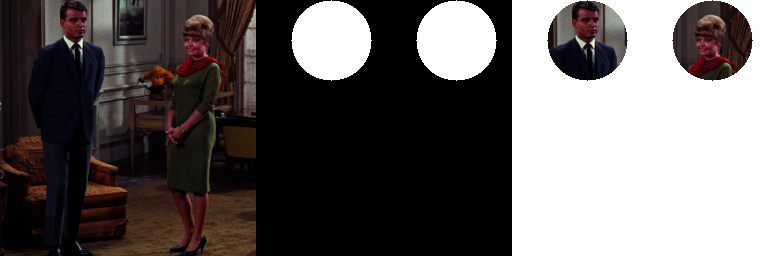

In [16]:
# Operasi AND (Dan)
# Membaca gambar dari file
input_image = cv.imread('/content/drive/MyDrive/couple.tiff')

# Membuat mask untuk lingkaran pertama dan kedua
mask1_and = np.zeros(img.shape, dtype = np.uint8)
mask1_and = cv.circle(mask1_and, (75,40), 40, (255,255,255), -1)

mask2_and = np.zeros(img.shape, dtype = np.uint8)
mask2_and = cv.circle(mask1_and, (200,40), 40, (255,255,255), -1)

# Melakukan operasi AND antara gambar dan kedua mask
result = img & mask1_and & mask2_and

# Mengubah area di luar mask menjadi putih
result[mask1_and==0] = 255

# Menggabungkan gambar asli, mask, dan hasil
final_frame = cv.hconcat((img, mask1_and, result))

# Menampilkan gambar hasil
cv2_imshow(final_frame)

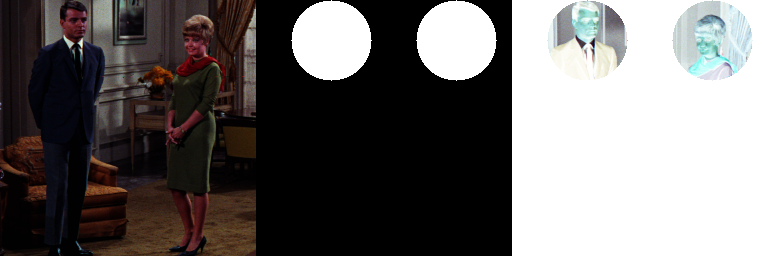

In [17]:
# Operasi NAND (Not And)
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar dari file
img = cv.imread('/content/drive/MyDrive/couple.tiff')

# Membuat mask untuk lingkaran pertama
mask1_notand = np.zeros(img.shape, dtype = np.uint8)
mask1_notand = cv.circle(mask1_notand, (75,40), 40, (255,255,255), -1)

# Membuat mask untuk lingkaran kedua
mask2_notand = np.zeros(img.shape, dtype = np.uint8)
mask2_notand = cv.circle(mask1_notand, (200,40), 40, (255,255,255), -1)

# Melakukan operasi NOT pada hasil AND untuk mendapatkan NAND
result = cv.bitwise_not(cv.bitwise_and(img,mask1_notand))

# Menggabungkan gambar asli, mask, dan hasil
final_frame = cv.hconcat((img, mask1_notand, result))

# Menampilkan gambar hasil
cv2_imshow(final_frame)

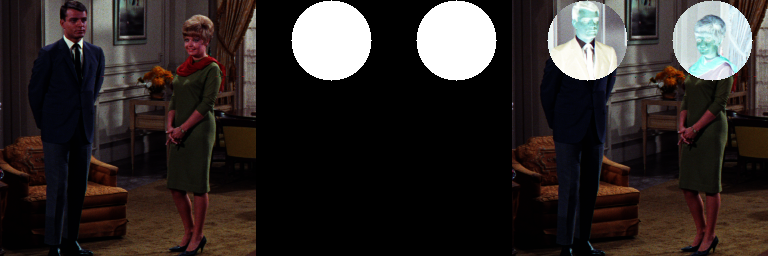

In [18]:
# Operasi XOR (Exclusive Or)
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar dari file
img = cv.imread('/content/drive/MyDrive/couple.tiff')

# Membuat mask untuk lingkaran pertama
mask1_xor = np.zeros(img.shape, dtype = np.uint8)
mask1_xor = cv.circle(mask1_xor, (75,40), 40, (255,255,255), -1)

# Membuat mask untuk lingkaran kedua
mask2_xor = np.zeros(img.shape, dtype = np.uint8)
mask2_xor = cv.circle(mask1_xor, (200,40), 40, (255,255,255), -1)

# Melakukan operasi XOR antara gambar dan mask
result = cv.bitwise_xor(img, mask1_xor)

# Menggabungkan gambar asli, mask, dan hasil XOR
final_frame = cv.hconcat((img, mask1_xor, result))

# Menampilkan gambar hasil
cv2_imshow(final_frame)



## Hasil Analisa
- Operasi NOT menghasilkan gambar invers dari gambar asli, di mana setiap piksel yang awalnya gelap menjadi terang, dan sebaliknya.

- Operasi OR pada dua gambar menghasilkan gambar yang setiap pikselnya merupakan hasil dari logika OR antara piksel yang bersesuaian. Jika salah satu dari dua piksel memiliki nilai warna yang terang, maka hasilnya juga akan terang.

- Operasi AND menghasilkan gambar di mana setiap pikselnya merupakan hasil dari logika AND antara piksel yang bersesuaian dari kedua gambar. Hanya piksel yang terang pada kedua gambar yang akan menghasilkan piksel terang pada gambar hasil.

- Operasi NAND menghasilkan gambar yang merupakan invers dari hasil operasi AND. Dengan kata lain, piksel pada gambar hasil akan terang jika kedua piksel asli memiliki nilai yang sama, namun dengan invers warna yang diterapkan.

- Operasi XOR menghasilkan gambar di mana bagian yang beririsan antara gambar dan mask akan ditampilkan dengan hasil inversi, sementara bagian yang tidak beririsan akan tetap ditampilkan seperti gambar aslinya.
